# CNN

### 1. MNIST

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices, one-hot
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_test.shape

(10000,)

In [8]:
y_test[1]

2

In [12]:
# np array not Series
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
# 標記是6的
index = np.where(y_train==6)[0]
y_train6 = np.zeros(len(x_train))
y_train6[index] = 1

index_test = np.where(y_test==6)[0]
y_test6 = np.zeros(len(x_test))
y_test6[index_test] = 1

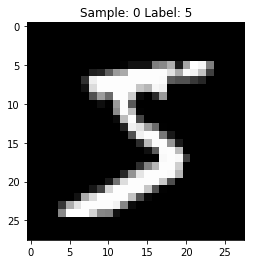

In [10]:
def display_img(num):
    # print(y_train[num])
    label = y_train_ohe[num].argmax(axis=0)
    image = x_train[num].reshape([28, 28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap='gray')
    
display_img(0)

### DNN model/ MLP
分辨六出來

In [8]:
flat_img = img_rows * img_cols
model_MLP = Sequential()
model_MLP.add(Dense(256, input_dim=flat_img, activation='relu'))
model_MLP.add(Dense(1, activation='sigmoid'))
model_MLP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 將 training 的 input 資料轉為2維(照片被拉直)
X_train_2D = x_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = x_test.reshape(10000, 28 * 28).astype('float32')
X_train_2D.shape

(60000, 784)

In [10]:
# Split the dataset into the training set and the validation set
# X_train_2D的每個像素都是0-255, 將其縮小成0-1
x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

In [11]:
train_history_MLP = model_MLP.fit(x=x_Train_norm, y=y_train6, validation_split=0.2, epochs=10, batch_size=800, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 12us/step - loss: 0.5155 - acc: 0.8900 - val_loss: 0.3558 - val_acc: 0.9025
Epoch 2/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.3226 - acc: 0.9011 - val_loss: 0.3047 - val_acc: 0.9025
Epoch 3/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2985 - acc: 0.9011 - val_loss: 0.2845 - val_acc: 0.9025
Epoch 4/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2771 - acc: 0.9011 - val_loss: 0.2608 - val_acc: 0.9025
Epoch 5/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2510 - acc: 0.9011 - val_loss: 0.2310 - val_acc: 0.9025
Epoch 6/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2191 - acc: 0.9011 - val_loss: 0.1968 - val_acc: 0.9025
Epoch 7/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.1871 - acc: 0.9011 - val_loss: 0.1675 - val_acc: 0.90

### 作圖

In [12]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

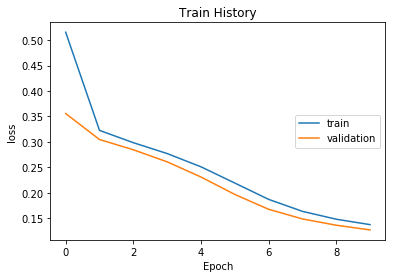

In [13]:
show_train_history(train_history_MLP, 'loss', 'val_loss')

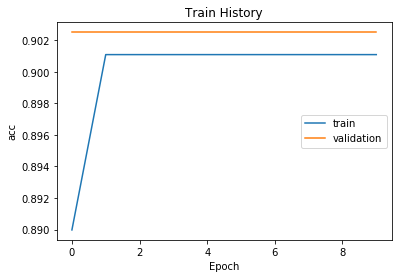

In [14]:
show_train_history(train_history_MLP, 'acc', 'val_acc')

In [15]:
prediction = model_MLP.predict(x_Test_norm )
prediction[0]

array([0.00694644], dtype=float32)

In [21]:
prediction.shape

(10000, 1)

### Confusion Matrix

In [16]:
import pandas as pd

pd.crosstab(y_test6, prediction[:, 0], rownames=['Label'], colnames=['Predict'])

Predict,0.0003191999567206949,0.00041234149830415845,0.00049004697939381,0.0005154496757313609,0.0005177756538614631,0.0005429120501503348,0.0005489735049195588,0.0005670791724696755,0.0005676188156940043,0.000583227607421577,...,0.4962927997112274,0.49630168080329895,0.49630501866340637,0.49630942940711975,0.4963096082210541,0.49631601572036743,0.4963165819644928,0.4963430166244507,0.49634531140327454,0.49634602665901184
Label,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
1.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,484


### ROC
> http://blog.changyy.org/2017/09/python-roc-receiver-operating.html

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test6, prediction[:, 0])
roc_auc = auc(fpr, tpr)

In [38]:
# print(fpr)
# print(tpr)
print(roc_auc)

0.9882711577010832


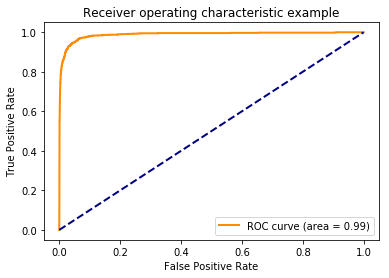

In [21]:
fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test6, (prediction > 0.5).astype(int), average=None)

/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.94969016, 0.        ])

### 手算TP/ TN等

### CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])